# Fitting Lines to find Tully Fisher Relation
In this activity, we will practice plotting as well as doing some basic line fitting.  We will be fitting lines with and without error weighting to find the Tully Fisher relationship.
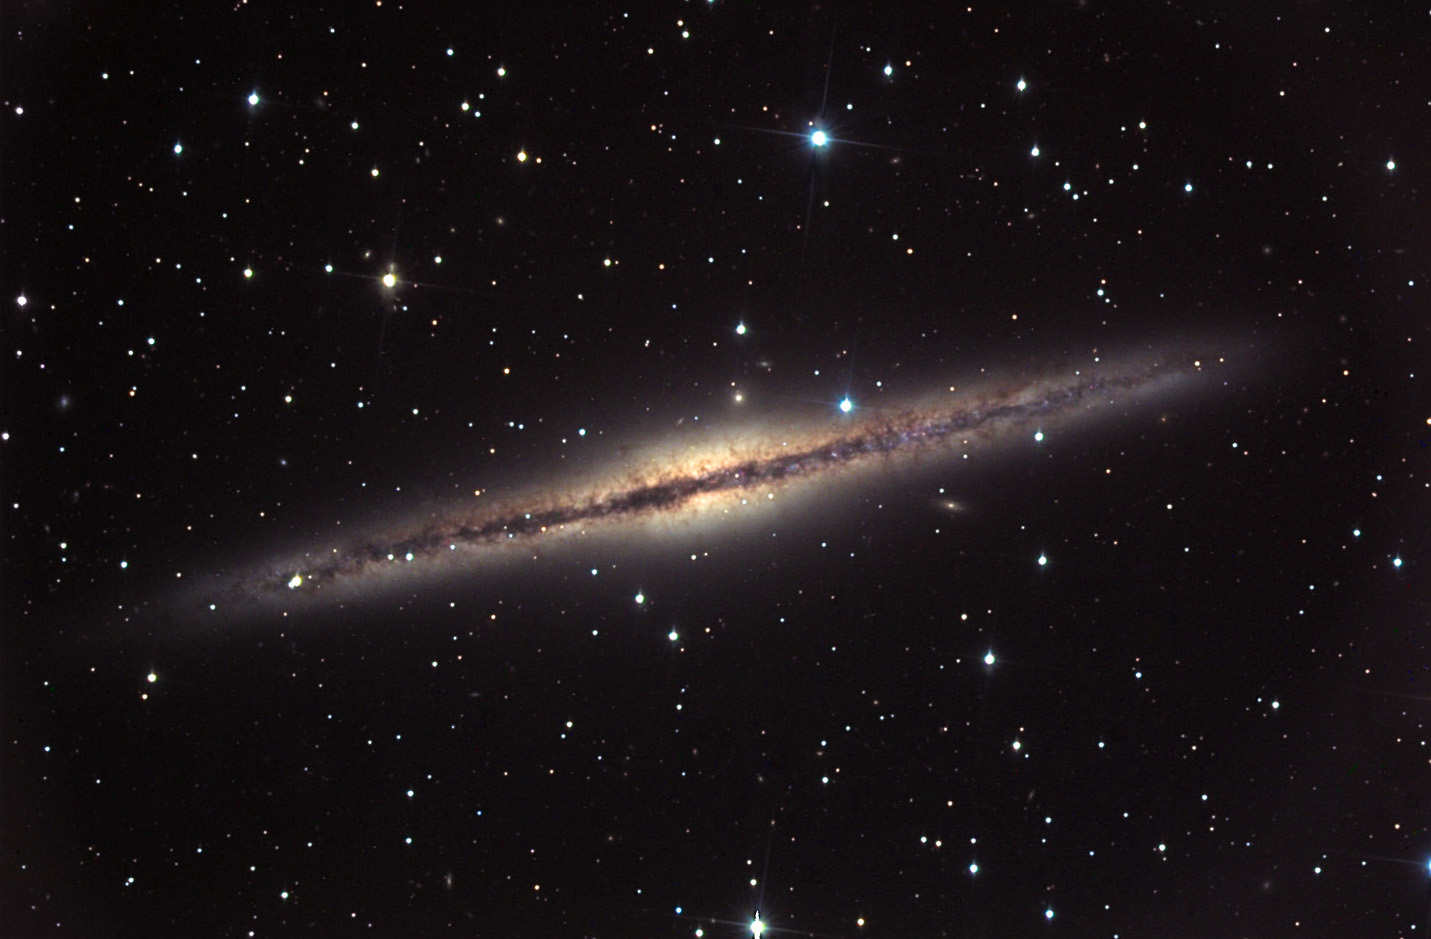

First, let's load our programs and data!  Most of these should look familiar, numpy does some math-y things, pandas reads datafiles, and matplotlib.pylot plots stuff!  The new one, scipy.optimize has some fancier line fitting tools that include error weighting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


df = pd.read_csv('tullyfishdata.txt', delim_whitespace=True)

Let's see what we are working with.  We can plot with error bars using the 'errorbar' code in matplotlib.  I've plotted the rotation velocity at 20% of the optical radius (W_20) vs. the B band magnitude.  The yerr and xerr tell matplotlib what to use for the error bars, and the ls='' tells the plot to not connect the points with a line (i.e. ls = linestyle, '' = none).  I also flipped my magnitude axis so brighter objects are at the top, fainter objects are at the bottom.  <b>Does this plot match what you would expect for a Tully Fisher relationship?</b>

Text(0, 0.5, 'Mag(B)')

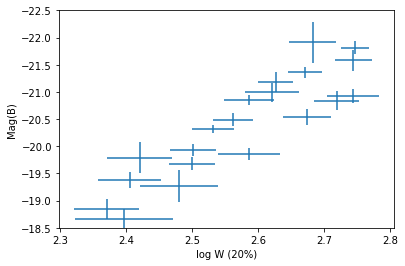

In [2]:
plt.errorbar(df['W_20'], df['B'], yerr = df['Berr'], xerr=df['W20_err'], ls='')
plt.ylim(-18.5, -22.5)
plt.xlabel('log W (20%)')
plt.ylabel('Mag(B)')

Sweet!  Now let's move on to fitting a line to our data.  The first version of this we are going to do is numpy's polyfit function.  Polyfit needs three inputs, the x data (rotational velocity), the y data (magnitude), and the degree of a polynomial to fit to.  Since we are fitting a line, we want a first degree polynomial.  

I've also made an array to use to fit my data.  This is x, and I made it using the numpy function 'arange'.  arange needs a start point, a stop point, and a step size.  So, I made an array starting at 2.3, going to 2.9, in steps of 0.1.  I then used my fit with this array to create y, which is the y-intercept from my fit + x * the slope of my fit.

In [5]:
fit1 = np.polyfit(df['W_20'], df['B'], deg=1)
x = np.arange(2.3, 2.9, 0.1)
y = fit1[1] + fit1[0]*x
print(fit1)

[-6.93627299 -2.52824779]


Text(0, 0.5, 'Mag(B)')

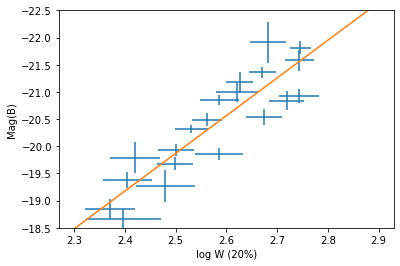

In [6]:
plt.errorbar(df['W_20'], df['B'], yerr = df['Berr'], xerr=df['W20_err'], ls='')
plt.plot(x, y)
plt.ylim(-18.5, -22.5)
plt.xlabel('log W (20%)')
plt.ylabel('Mag(B)')

Now, I'm going to do some error-weighted fitting and compare the two.  To do this, I've used curve_fit from scipy.  To use curve_fit, we first have to define the type of function we want to fit to.  Since we are just looking to fit a line, I've defined a function that takes a variable called x, a slope (m), and a y-intercept (b), and returning the y value equal to mx+b.  

Then I can give curve_fit the form of our expected fit (a line), our x-data, our y-data, and the weighting for our data (1/error, since bigger errors should be given lower weights).  I then plotted our two line fits with our data, along with a legend on the plot.

Weighted fit parameters: [-7.12983437 -1.92694295]


(-18.5, -22.5)

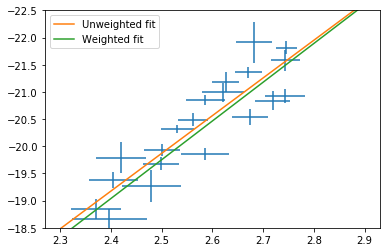

In [7]:
def line(x,m,b):
    return m*x+b

popt2, pcov2 = curve_fit(line, df['W_20'], df['B'], sigma=1./df['W20_err'], absolute_sigma=True)
yfit2 = line(x, *popt2)
print('Weighted fit parameters:', popt2)

plt.errorbar(df['W_20'], df['B'], yerr = df['Berr'], xerr=df['W20_err'], ls='')
plt.plot(x, y, label='Unweighted fit')
plt.plot(x, yfit2, label='Weighted fit')
plt.legend()
plt.ylim(-18.5, -22.5)


Now it's your turn!  Try out weighted and unweighted fits for the R band data (everything is the same, we just replace 'B' and 'B_err' with 'R' and 'R_error').  How good is your fit (just by eye)?  How much does the error weighting matter?  How might you improve this line fitting?